In [200]:
import pdftotext
import matplotlib.pyplot as plt
import re
import random

In [19]:
def is_image(file_path):
    with open(file_path, "rb") as f:
        return pdftotext.PDF(f)

In [119]:
fpath = "../input/India/10.NMSA_Guidelines_English.pdf"
print(is_image(fpath))

## NLTK

In [152]:
import nltk.data
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")

def get_nltk_sents(txt):
    sents = tokenizer.tokenize(txt)
    
    return sents

## SpaCy

In [153]:
import spacy 
nlp = spacy.load("en_core_web_lg") 

def get_spacy_sents(txt):
    doc = nlp(txt)
    sents = list(doc.sents)
    
    return sents

## Comparison methods

In [193]:
def word_count_dist(sents1, sents2):
    sent_lengths1 = [len(str(sent).split()) for sent in sents1]
    sent_lengths2 = [len(str(sent).split()) for sent in sents2]
    
    fig, (ax1, ax2) = plt.subplots(2, 1)
    
    fig.suptitle('# of words per sentence distributions')

    ax1.hist(sent_lengths1)
    ax1.set_ylabel('NLTK # of words ')
    
    ax2.hist(sent_lengths2)
    ax2.set_xlabel('Number of sentences')
    ax2.set_ylabel('SpaCy # of words')

    plt.show()
    
def show_compare_sents(sents1, sents2, start_idx=0, end_idx=10):
    for i, (sent1, sent2) in enumerate(zip(sents1[start_idx:end_idx], sents2[start_idx:end_idx])):
        print(f"Spacy sentence {i}: {sent1}")
        print(f"NLTK sentence {i}: {sent2}\n\n-------------------------\n")

## Load Data

In [174]:
base_path = "../input/USA/"
# test_paths = ["Sample_NATIONALAGROFORESTRYPOLICY.txt", "text_PESA.txt", "text_MineralConcessionRules1960.txt"]
test_paths = ["Federal Register, Volume 85 Issue 190 (Wednesday, September 30, 2020).htm"]
txt_path = base_path + test_paths[0]

with open(txt_path, "r") as txt_file:
    txt = txt_file.read()

In [179]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [181]:
# Optional preprocessing
txt = remove_html_tags(txt).replace("\n", " ").replace("\t", " ").strip()

## Comparison analysis

Number of sentences identified by NLTK: 237
Number of sentences identified by spaCy: 277


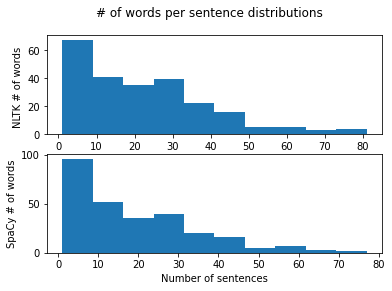

In [194]:
nltk_sents = get_nltk_sents(txt)
spacy_sents = get_spacy_sents(txt)

print("Number of sentences identified by NLTK:", len(nltk_sents))
print("Number of sentences identified by spaCy:", len(spacy_sents))
word_count_dist(nltk_sents, spacy_sents)

In [173]:
show_compare_sents(spacy_sents, nltk_sents)

Spacy sentence 0: Government of India Ministry of Mines MINERAL CONCESSION RULES, 1960 (As amended up to 26th July, 2012) Issued by CONTROLLER GENERAL, INDIAN BUREAU OF MINES,
NLTK sentence 0: Government of India Ministry of Mines MINERAL CONCESSION RULES, 1960 (As amended up to 26th July, 2012) Issued by CONTROLLER GENERAL, INDIAN BUREAU OF MINES, NAGPUR October, 2012 Price: (Inland) Rs.

-------------------------

Spacy sentence 1: NAGPUR October, 2012
NLTK sentence 1: 195.00; (Foreign) £ 2.53 or $ 4.24 _____________________________ Printed at IBM Press, 15/500/August, 2005  Rule CONTENTS I - Preliminary Page No.

-------------------------

Spacy sentence 2: Price:
NLTK sentence 2: CHAPTER 1.

-------------------------

Spacy sentence 3: (Inland) Rs.
NLTK sentence 3: Short title 2.

-------------------------

Spacy sentence 4: 195.00; (Foreign) £ 2.53 or $ 4.24
NLTK sentence 4: Definitions 3.

-------------------------

Spacy sentence 5: ____
NLTK sentence 5: Saving of Act 33 of 1962

In [224]:
# Now let's get some sample sentences with a given length
def sample_sents_by_word_count(sents, word_count_range, sents_idx, random=False):
    result_sents = []
    word_counts = [len(str(sent).split()) for sent in sents]
    
    for sent, count in zip(sents, word_counts):
        if word_count_range[0] <= count <= word_count_range[1]:
            result_sents.append(sent)
    
    if random:
        return random.sample(result_sents, sents_idx[1])
    return result_sents[sents_idx[0]:sents_idx[1]]

In [230]:
sample_sents_by_word_count(nltk_sents, [1, 10], [0, 30])

['ACTION: Final rule.',
 '-----------------------------------------------------------------------  SUMMARY: We, the U.S.',
 'DATES: This rule is effective October 30, 2020.',
 'FWS-R4-ES-2018-0074 and at https://www.fws.gov/southeast/.',
 'FWS-R4-ES-2018-0074.',
 'FOR FURTHER INFORMATION CONTACT: William Pearson, Field Supervisor,  U.S.',
 '1531 et seq.).',
 'Both documents are available at http://www.regulations.gov  under Docket No.',
 'None of  the comments opposed the proposed 4(d) rule.',
 'Lexis 60203 (D. Or.',
 'Lexis 5432 (W.D.',
 'Wash. 2002)).',
 '1988)).',
 'Rep. No.',
 '412, 93rd Cong., 1st  Sess.',
 '1973).',
 'This  curtails the likelihood of incidental take occurring.',
 'Regulations governing permits are codified at 50  CFR 17.32.',
 'OIRA has determined that  this rule is not significant.',
 'E.O.',
 '13563 reaffirms the principles of E.O.',
 'E.O.',
 'Regulatory Flexibility Act (5 U.S.C.',
 '601 et seq.)',
 'Under the Regulatory Flexibility Act (RFA; 5 U.S.C.',
 '601 

In [231]:
sample_sents_by_word_count(spacy_sents, [1, 10], [0, 30])

[www.gpo.gov],
 [FR Doc,
 No: 2020-19109,
 ]   ======================================================================= -----------------------------------------------------------------------  ,
 DEPARTMENT OF,
 THE INTERIOR  Fish and Wildlife Service  50 CFR Part 17  ,
 [Docket No.,
 FWS-R4-ES-2018-0074; FF09E21000 FXES11110900000 201],
 RIN 1018-BD43   Endangered and Threatened Wildlife and Plants; Section 4(d),
 Rule  for Trispot Darter  AGENCY:,
 Fish and Wildlife Service, Interior.  ,
 ACTION:,
 Final rule.  ,
 -----------------------------------------------------------------------  ,
 SUMMARY:,
 DATES: This rule is effective October 30, 2020.  ,
 ADDRESSES:,
 Docket No.,
 FWS,
 -R4-ES-2018-0074,
 Docket No.  ,
 FWS,
 -R4-ES-2018-0074.  ,
 FOR FURTHER INFORMATION CONTACT:,
 SUPPLEMENTARY INFORMATION:  ,
 Previous Federal Actions      ,
 Summary of Changes From the Proposed Rule      ,
 Specifically, we replaced the term  ``highest-standard best management practices'',
 with the ter

## Observations

- It appears that spaCy gets confused with numbers (i.e 1.4 or 3.4) and counts them as their own sentence
- Replacing new lines, tabs and trailing spaces seem to benefit the sentence splitting for spaCy.
- spaCy seems to have troubles with symbols as well, such as lines --------

**TODO**:
- [ ] Try looking at examples from different parts of the distribution
- [ ] Check other documents - also Spanish from Chile and El Salvador
- [ ] Compare with rule based system

**General TODO**:
- Make sure to define the PDF reading part well